In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
cd /content/drive/My Drive/ML

/content/drive/My Drive/ML


In [0]:
import wget

In [0]:
link = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

In [86]:
wget.download(link)

'cats_and_dogs_filtered.zip'

In [0]:
data = "./"

In [0]:
!unzip -q cats_and_dogs_filtered.zip -d $data

In [0]:
train_data = data + "cats_and_dogs_filtered/train"
valid_data = data + "cats_and_dogs_filtered/validation"

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [0]:
gen_train = ImageDataGenerator(rescale=1/255)
gen_valid = ImageDataGenerator(rescale=1/255)

In [0]:
model = Sequential()

In [93]:
model.add(Conv2D(16, (3,3), activation="relu", input_shape = (200, 200, 3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 33856)            

In [94]:
gen_training_data = gen_train.flow_from_directory(
    train_data,
    target_size = (200, 200),
    batch_size = 130,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [95]:
gen_validation_data = gen_valid.flow_from_directory(
    valid_data,
    target_size = (200,200),
    batch_size = 130,
    class_mode = "binary"
)

Found 1000 images belonging to 2 classes.


In [0]:
model.compile(loss = "binary_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["acc"])

In [97]:
history = model.fit_generator(
    gen_training_data,
    steps_per_epoch = 30,
    epochs = 20,
    verbose = 1,
    validation_data = gen_validation_data,
    validation_steps = 30
)

Epoch 1/20
30/30 [==============================] - 29s 979ms/step - loss: 1.2517 - acc: 0.4997 - val_loss: 0.6807 - val_acc: 0.6431
Epoch 2/20
30/30 [==============================] - 29s 964ms/step - loss: 0.6867 - acc: 0.5570 - val_loss: 0.6716 - val_acc: 0.6417
Epoch 3/20
30/30 [==============================] - 29s 958ms/step - loss: 0.6779 - acc: 0.6104 - val_loss: 0.6597 - val_acc: 0.5417
Epoch 4/20
30/30 [==============================] - 30s 995ms/step - loss: 0.6660 - acc: 0.6663 - val_loss: 0.5828 - val_acc: 0.7013
Epoch 5/20
30/30 [==============================] - 29s 969ms/step - loss: 0.5511 - acc: 0.7225 - val_loss: 0.5619 - val_acc: 0.7259
Epoch 6/20
30/30 [==============================] - 29s 957ms/step - loss: 0.5342 - acc: 0.7487 - val_loss: 0.5622 - val_acc: 0.7281
Epoch 7/20
30/30 [==============================] - 29s 966ms/step - loss: 0.4558 - acc: 0.7933 - val_loss: 0.5731 - val_acc: 0.7190
Epoch 8/20
30/30 [==============================] - 29s 965ms/step - 

In [0]:
model.save("classifiedDogsOrCats.h5")

In [0]:
from google.colab import files
from keras.preprocessing import image

Saving tải xuống (1).jfif to tải xuống (1).jfif
Classes's values =  [[7.9142796e-05]]


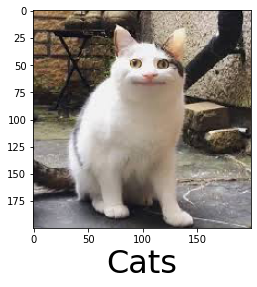

In [114]:
uploaded = files.upload()

for k in uploaded.keys():
    path = "./" + k
    img = image.load_img(path, target_size = (200,200))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)

    print("Classes's values = ", classes)

    if (classes[0] > 0.5):
        plt.imshow(img)
        plt.xlabel("Dogs", size = 32)
    else:
        plt.imshow(img)
        plt.xlabel("Cats", size = 32)